### Loading the Libraries

In [ ]:
# Installing Packages
install.packages("tidymodels");
install.packages("aod")
install.packages("ggcorrplot");

In [258]:
library(tidyverse)
library(ggcorrplot)
library(tidymodels)
library(readr)
library(aod)
library(glmnet)

### Exploratory Analysis: Finding Explanatory Variables

In [288]:
#Reading the dataset into R
train <- read.csv("train.csv") 
train$Customer_Churn <- as.factor(train$Customer_Churn) #Turn from Integer into a factor

#Selecting Explanatory Variables
train_personal <- train |> 
                select(Overall_Usage_Frequency, AI_Interaction_Level,Customer_Churn);

#Reading the testing set into R
test <- read.csv("test.csv")
test$Customer_Churn <- as.factor(test$Customer_Churn)

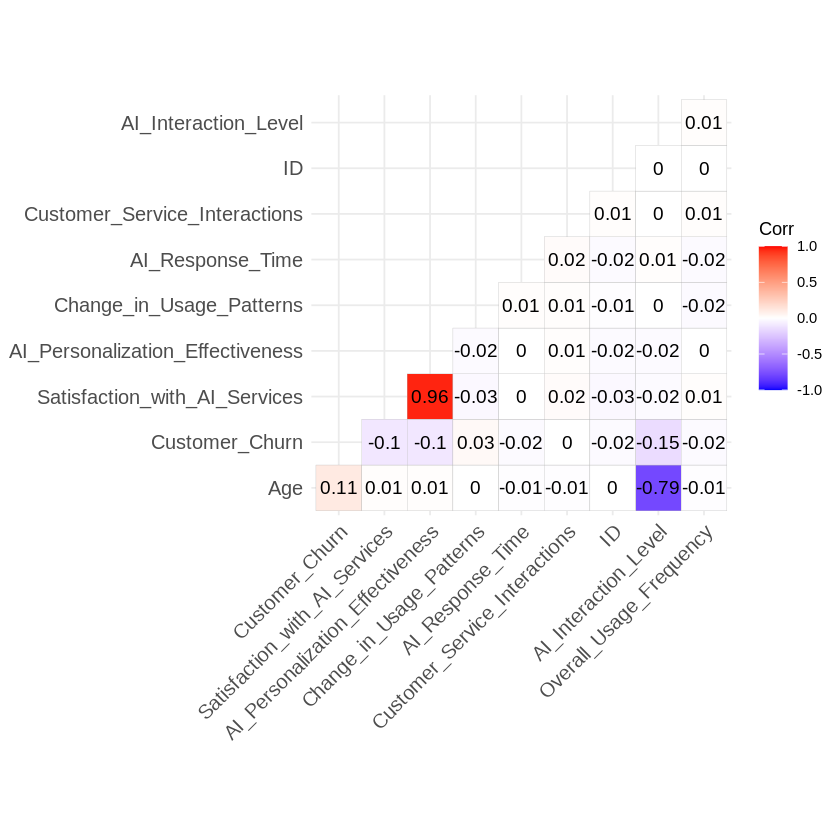

In [290]:
# standardized_data <- train |> mutate_all(~(scale(.) %>% as.vector))
# churn <- train |> filter(Customer_Churn == 1)
# non_churn <- train |> filter(Customer_Churn == 0)

# Correlation for different combinations of variables
correlation<- standardized_data |> cor(use="complete.obs") # find the correlation
ggcorrplot(correlation, 
          hc.order = TRUE, 
          lab = TRUE, 
          type = "lower");

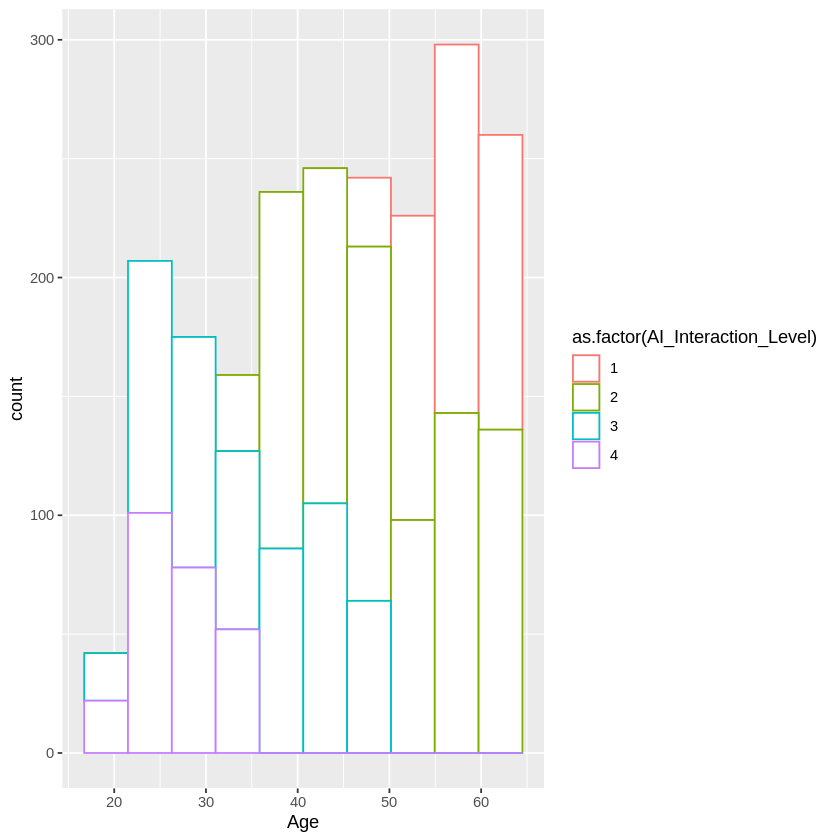

In [261]:
compare_customers <- function(){
    ggplot(churn, aes(x = Age, color = as.factor(AI_Interaction_Level))) +
    geom_histogram(fill = "white", bins = 10)
}

compare_customers()

### Attempting Logistic Regression
#### Assumptions
1. The explanatory variables must be relatively independent - that means two chosen variables cannot have a high correlation
2. Binary Outcomes - Churn (1) or No Churn (0)
3. 

In [291]:
set.seed(2024)

## Intialize the logistic Regression model
model <- logistic_reg(penalty = double(1),
                      mixture = double(1),
                     engine = "glmnet", 
                     mode = "classification") |>
          fit(Customer_Churn ~ ., data = train)

# Make a prediction for the test data
pred_class <- predict(model, new_data = test, type = "class") 
results <- test |>
    select(Customer_Churn) |>
    bind_cols(pred_class)

# Checking the results 
conf_mat(results, truth = Customer_Churn,
         estimate = .pred_class)
precision(results, 
          truth = Customer_Churn,
          estimate = .pred_class)

          Truth
Prediction   0   1
         0 569 377
         1 145 159

.metric   .estimator .estimate
1 precision binary     0.6014799

### Tuning the Classifier - Cross Validation, Lasso Regression